![This is an image](https://letsgrowmore.in/wp-content/uploads/2021/05/growmore-removebg-preview.png)
## ***Virtual Internship Program***
***Data Science  Tasks***
### ***Author: SARAVANAVEL***

# ***ADVANCED LEVEL TASK***
### Task 8 -Next Word Prediction
Using Tensorflow and Keras library train a RNN , to predict the next word.


Dataset Link: https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

## Importing packages

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

## Loading the data

In [2]:
path = 'sample_text.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


## Data Preprocessing

In [4]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [5]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [6]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [7]:
sentences[124]

'\nauthor: arthur conan doyle\n\nrelease dat'

In [8]:
next_chars[100]

'e'

In [9]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [10]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [11]:
X.shape

(193950, 40, 73)

In [12]:
y.shape

(193950, 73)

# Creating the model

In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               103424    
_________________________________________________________________
dense (Dense)                (None, 73)                9417      
_________________________________________________________________
activation (Activation)      (None, 73)                0         
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


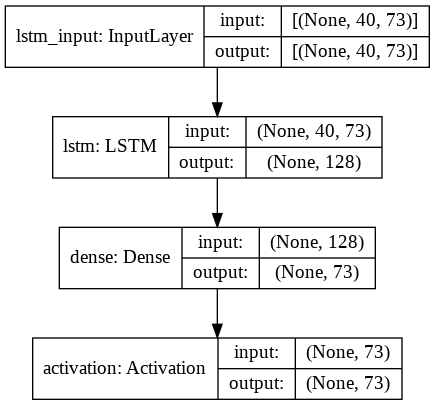

In [14]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

# Training our model

In [15]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=30, 
                    shuffle=True).history

Epoch 1/30
1501/1501 [==============================] - 23s 14ms/step - loss: 1.9425 - accuracy: 0.4286 - val_loss: 2.2035 - val_accuracy: 0.3918
Epoch 2/30
1501/1501 [==============================] - 19s 12ms/step - loss: 1.6090 - accuracy: 0.5171 - val_loss: 2.0659 - val_accuracy: 0.4474
Epoch 3/30
1501/1501 [==============================] - 18s 12ms/step - loss: 1.5157 - accuracy: 0.5433 - val_loss: 1.9985 - val_accuracy: 0.4582
Epoch 4/30
1501/1501 [==============================] - 18s 12ms/step - loss: 1.4672 - accuracy: 0.5563 - val_loss: 2.0102 - val_accuracy: 0.4567
Epoch 5/30
1501/1501 [==============================] - 18s 12ms/step - loss: 1.4352 - accuracy: 0.5660 - val_loss: 1.9749 - val_accuracy: 0.4794
Epoch 6/30
1501/1501 [==============================] - 18s 12ms/step - loss: 1.4096 - accuracy: 0.5712 - val_loss: 2.0004 - val_accuracy: 0.4778
Epoch 7/30
1501/1501 [==============================] - 18s 12ms/step - loss: 1.3939 - accuracy: 0.5770 - val_loss: 1.9970 -

In [16]:
#saving our model
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [17]:
#loading our model
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

## Model Evaluation

In [18]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 36s 6ms/step - loss: 1.2202 - accuracy: 0.6240
Test Loss 1.2202041149139404
Test Accuracy 0.6239752769470215


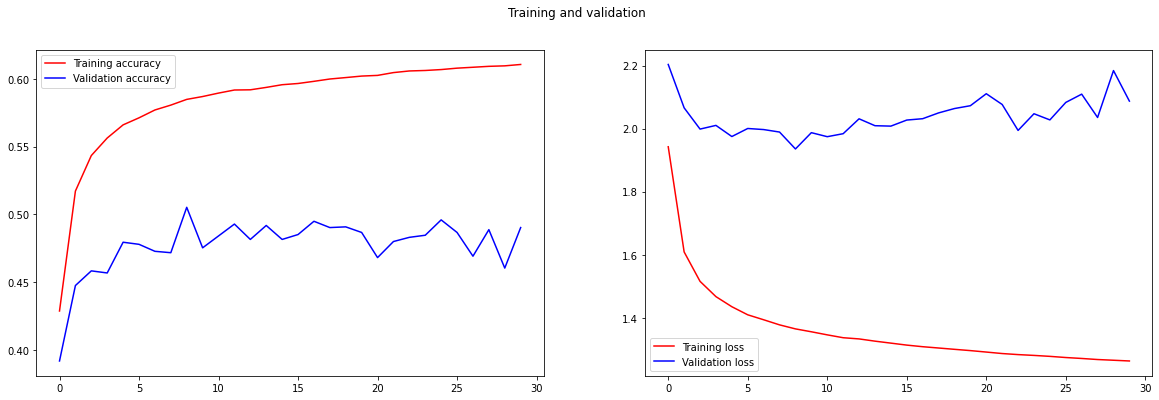

In [19]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [20]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [21]:
prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### functions to get next probable characters

In [22]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [23]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [24]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

# Prediction

In [25]:
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."  
    
]

In [26]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()
    

deep learning is subset of machine learn
['ed ', 'ing ', 'y ', ' to ', 'ales ']

machine learning  is the study of comput
['ion ', 'e ', 'on.”\n\n“well, ', 'tence ', 'ant ']

it is not a lack of love, but a lack of 
['the ', 'considerable ', 'her ', 'my ', 'a ']

recurrent neural network (rnn) is a type
['ctient ', 'ssion ', 'mplication ', 'writter ', 'ar ']

thanks for spending your precious time t
['hat ', 'o ', 'rain ', 'ell ', 'ime ']



# THANK YOU!!